# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# !pip install citipy

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# url = f'https://api.openweathermap.org/data/2.5/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}

# url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'
# replaceUrl = url.replace(" ", "%20")
# city_weather = requests.get(replaceUrl).json()
# city_weather

In [9]:
#Begin printing log
print("Beginning Data Retrieval:")
print("-------------------------")

#Create empty list to hold city data and counters for looping
city_list = []
loop_counter = 0
set_counter= 1
record_counter = 1

#Loop through the list of cities and print out in sets of 50
for city in cities:
    if (loop_counter % 50 == 0 and loop_counter >=50):
        record_counter = 1
        set_counter += 1
    
    loop_counter += 1
    
    print(f"Processing Record {record_counter} of Set {set_counter} | {city}")
    record_counter += 1
    
    #API request for each city and store into data list
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}&q={city}"
    
    #Use a try to retrieve information about each city and an except to skip any cities with missing information
    try:
        weather = requests.get(url).json()
        date = weather["dt"]
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        humidity = weather["main"]["humidity"]
        max_temp = weather["main"]["temp_max"]
        clouds = weather["clouds"]["all"]
        wind_speed = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        
        city_list.append({
           
            "City": city,
            "Lat": latitude,
            "Lng": longitude,
            "Max Temp": max_temp,
            "Humidity": humidity,
            "Cloudiness": clouds,
            "Wind Speed": wind_speed,
            "Country": country,
             "Date": date
        })
        
    except:
        print("City not found. Skipping.")
        pass
    
    
print("-----------------------")
print("Data Retrieval Complete")
print("-----------------------")
        

Beginning Data Retrieval:
-------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | beyla
Processing Record 5 of Set 1 | katsuura
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | puerto del rosario
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping.
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | quartucciu
Processing Record 12 of Set 1 | souillac
Processing Record 13 of Set 1 | sitka
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | port blair
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | margate
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | avarua
Processing Record 23 

Processing Record 40 of Set 4 | clearwater
Processing Record 41 of Set 4 | namatanai
Processing Record 42 of Set 4 | yumen
Processing Record 43 of Set 4 | hami
Processing Record 44 of Set 4 | labuhan
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | dakar
Processing Record 47 of Set 4 | bowen
Processing Record 48 of Set 4 | santa cruz
Processing Record 49 of Set 4 | lucea
Processing Record 50 of Set 4 | tuktoyaktuk
Processing Record 1 of Set 5 | mabaruma
Processing Record 2 of Set 5 | roblin
Processing Record 3 of Set 5 | masty
Processing Record 4 of Set 5 | ubinskoye
Processing Record 5 of Set 5 | flinders
Processing Record 6 of Set 5 | byron bay
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | grimshaw
Processing Record 9 of Set 5 | daru
Processing Record 10 of Set 5 | sakakah
Processing Record 11 of Set 5 | las vegas
Processing Record 12 of Set 5 | nizhniy kuranakh
Processing Record 13 of Set 5 | pierre
Processing Record 14 of Set 5 | santa

Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | sibolga
Processing Record 36 of Set 8 | lyubinskiy
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | yarmouth
Processing Record 39 of Set 8 | sawtell
Processing Record 40 of Set 8 | shchelyayur
City not found. Skipping.
Processing Record 41 of Set 8 | erenhot
Processing Record 42 of Set 8 | north battleford
Processing Record 43 of Set 8 | jiangkou
Processing Record 44 of Set 8 | port lincoln
Processing Record 45 of Set 8 | islamkot
Processing Record 46 of Set 8 | galiwinku
City not found. Skipping.
Processing Record 47 of Set 8 | kawana waters
City not found. Skipping.
Processing Record 48 of Set 8 | merida
Processing Record 49 of Set 8 | gamba
Processing Record 50 of Set 8 | nicoya
Processing Record 1 of Set 9 | moose factory
Processing Record 2 of Set 9 | rawson
Processing Record 3 of Set 9 | taperoa
Processing Record 4 of Set 9 | swellendam
Processing Record 5 of Set 9 | hun
Processing Re

Processing Record 26 of Set 12 | mandalgovi
Processing Record 27 of Set 12 | aguimes
Processing Record 28 of Set 12 | karpathos
Processing Record 29 of Set 12 | dutse
Processing Record 30 of Set 12 | chenghai
Processing Record 31 of Set 12 | itarema
Processing Record 32 of Set 12 | beaverlodge
Processing Record 33 of Set 12 | kaihua
Processing Record 34 of Set 12 | charters towers
Processing Record 35 of Set 12 | atambua
Processing Record 36 of Set 12 | ponta delgada
Processing Record 37 of Set 12 | filotion
Processing Record 38 of Set 12 | airai
Processing Record 39 of Set 12 | emet
Processing Record 40 of Set 12 | meadow lake
Processing Record 41 of Set 12 | seinajoki
Processing Record 42 of Set 12 | russell
Processing Record 43 of Set 12 | kendal
Processing Record 44 of Set 12 | bursa
Processing Record 45 of Set 12 | yazd
Processing Record 46 of Set 12 | tutoia
Processing Record 47 of Set 12 | belaya gora
Processing Record 48 of Set 12 | kailua
Processing Record 49 of Set 12 | urdzh

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_pd = pd.DataFrame(city_list)
city_pd.to_csv("../output_data/weather_table.csv")
city_pd.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [11]:
city_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.53,20.04,60.80,87,0,2.24,ZA,1601931938
1,kapaa,22.08,-159.32,84.20,74,90,13.87,US,1601931939
2,khatanga,71.97,102.50,18.93,98,87,5.32,RU,1601931939
3,beyla,8.68,-8.63,67.84,95,97,1.57,GN,1601931939
4,katsuura,35.13,140.30,69.01,49,75,13.87,JP,1601931939


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
city_pd = city_pd.rename(columns={'humidity' : 'humidity'})
city_pd = city_pd[city_pd.Humidity >= 100]
city_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
40,port macquarie,-31.43,152.92,62.01,100,40,5.82,AU,1601931945
98,bereda,43.27,-7.54,64.00,100,100,7.00,ES,1601931954
115,oussouye,12.48,-16.55,75.20,100,75,2.24,SN,1601931957
184,tuktoyaktuk,69.45,-133.04,35.60,100,90,14.99,CA,1601931969
190,byron bay,-28.65,153.62,60.01,100,17,3.33,AU,1601931970


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print ("Int64Index([], dtype='int64')")

Int64Index([], dtype='int64')


In [14]:
# Extract relevant fields from the data frame
city_pd = pd.DataFrame(city_list)
city_pd.to_csv("../output_data/weather_table.csv")

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

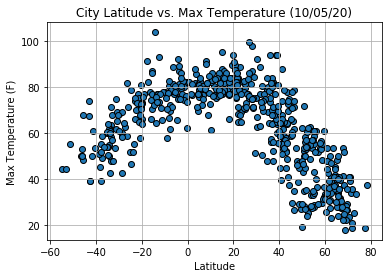

In [15]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Lat"], city_pd["Max Temp"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("../output_data/Lat_Temp.png")
plt.show() 	 

## Latitude vs. Humidity Plot

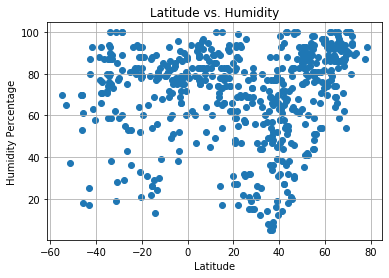

This plot shows the relationship between humidity and latitude. It seems like it gets more humid the farther you get from the equator.


In [18]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Lat"], city_pd["Humidity"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("../output_data/Lat_Humidity.png")
plt.show()



## Latitude vs. Cloudiness Plot

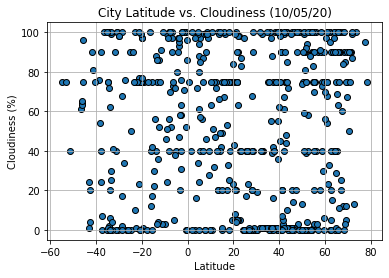

In [19]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Lat"], city_pd["Cloudiness"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("../output_data/Lat_Cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

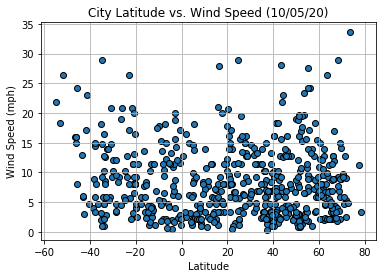

In [20]:
#Latitude vs Temperature scatter plot
plt.scatter(city_pd["Lat"], city_pd["Wind Speed"], edgecolor="black", marker="o", label="Cities")

#Plot labels and title
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("../output_data/Lat_Wind.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression